# Supervised Learning Challenge
IMT Atlantique - IT Msc 2022

*Authors:*

1. *Miguel Ángel Guzmán Sánchez*

2. *Kadriye Nur Bakirci*

3. *Mahammat Nour Ali Mai*

4. *Santiago Guerra*

5. *Shikhar Saini*

In [ ]:
#Import important libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import glob
import os


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

import warnings 
warnings.filterwarnings('ignore')

## Importing datasets

In [ ]:
#Connect with google-drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing only 2113 datasets 
import os
path = '/content/drive/MyDrive/Colab Notebooks/Challenge2Supervised/HGS/2113'
directories = os.listdir(path)
columns = ['s'+str(i) for i in range(1,19)]
dfs = [pd.read_csv(path + '/' + j, sep=';', header=None) for j in directories]

In [ ]:
#Merging of all datasets 
df_new = pd.concat(dfs, ignore_index=True)

In [ ]:
#Take one percentage of data
df_new = df_new.sample(frac=0.01)

In [ ]:
#Importing only 2213 datasets 
import os
path = '/content/drive/MyDrive/Colab Notebooks/Challenge2Supervised/HGS/2213'
directories = os.listdir(path)
columns = ['s'+str(i) for i in range(1,19)]
dfs1 = [pd.read_csv(path + '/' + j, sep=';', header=None) for j in directories]

In [ ]:
#Merging of all datasets
df_new1 = pd.concat(dfs1, ignore_index=True)

In [ ]:
#Take one percentage of data
df_new1 = df_new1.sample(frac=0.01)

In [ ]:
#Importing only 3113 datasets 
import os
path = '/content/drive/MyDrive/Colab Notebooks/Challenge2Supervised/HGS/3113'
directories = os.listdir(path)
columns = ['s'+str(i) for i in range(1,19)]
dfs2 = [pd.read_csv(path + '/' + j, sep=';', header=None) for j in directories]

In [ ]:
df_new2 = pd.concat(dfs2, ignore_index=True)

In [ ]:
#Take one percentage of data
df_new2 = df_new2.sample(frac=0.01)

In [ ]:
#Importing only 3213 datasets 
import os
path = '/content/drive/MyDrive/Colab Notebooks/Challenge2Supervised/HGS/3213'
directories = os.listdir(path)
columns = ['s'+str(i) for i in range(1,19)]
dfs3 = [pd.read_csv(path + '/' + j, sep=';', header=None) for j in directories]

In [ ]:
df_new3 = pd.concat(dfs3, ignore_index=True)

In [ ]:
#Take one percentage of data
df_new3 = df_new3.sample(frac=0.01)

In [ ]:
df = pd.concat([df_new,df_new1, df_new2, df_new3], ignore_index=True)

In [ ]:
df.shape

(108398, 20)

In [ ]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19],
           dtype='int64')

In [ ]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,XML100_2113_23,13172,269.160,85.5901,0.2460,0.1315,527.800,102.996,0,310.400,0.2339,0.1440,505.500,0.2000,0.1000,0.0000,252.819,491.611,0.0000,3.3833
1,XML100_2113_08,13180,199.701,122.3740,0.1750,0.0965,461.667,143.567,0,281.333,0.2685,0.1462,448.333,0.2639,0.1319,0.0609,353.895,424.426,1.6499,3.3899
2,XML100_2113_17,13924,223.212,107.1280,0.1883,0.1050,471.083,140.229,0,309.917,0.2820,0.1456,461.333,0.3704,0.1852,0.2457,377.737,443.856,2.2111,3.2552
3,XML100_2113_02,13949,239.596,107.3020,0.2279,0.1123,483.333,152.528,0,342.167,0.3076,0.1453,533.667,0.3704,0.1852,0.2457,361.082,471.406,2.2111,3.2292
4,XML100_2113_10,12941,245.589,146.5840,0.1984,0.1021,467.909,135.374,0,269.091,0.2538,0.1450,461.091,0.3657,0.1828,0.2584,403.621,431.758,2.5745,3.2109
5,XML100_2113_10,13249,266.668,154.0720,0.2416,0.1821,464.000,128.897,0,315.818,0.2683,0.1470,520.455,0.2371,0.1185,0.0434,360.103,434.866,1.8318,3.0568
6,XML100_2113_27,14101,243.157,138.2850,0.2263,0.1394,482.583,153.282,0,313.167,0.2776,0.1242,512.333,0.3704,0.1852,0.2457,395.881,458.521,2.2111,2.7708
7,XML100_2113_23,13767,252.201,106.1830,0.2133,0.0786,511.727,120.888,0,329.818,0.2718,0.1502,489.091,0.2502,0.1251,0.0670,325.615,467.138,2.1086,3.3586
8,XML100_2113_06,14203,221.003,115.2640,0.1934,0.1378,494.833,161.426,0,334.333,0.2965,0.1340,511.167,0.3704,0.1852,0.2457,394.733,465.452,2.2111,3.1563
9,XML100_2113_02,13919,231.106,84.2847,0.2321,0.0725,486.083,164.944,0,346.750,0.3147,0.1729,539.750,0.2894,0.1447,0.1072,380.018,474.561,1.9293,3.2619


In [ ]:
df.tail(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
108388,XML100_3213_04,21996,107.596,56.7359,0.0473,0.0311,884.917,291.637,0,762.333,0.4072,0.0877,1431.50,0.2646,0.1323,0.0612,607.324,458.602,1.6997,5.8108
108389,XML100_3213_26,21054,163.232,115.3460,0.0470,0.0350,977.200,118.343,0,862.200,0.4096,0.0583,1663.80,0.3636,0.1818,0.2727,277.179,395.693,3.0000,4.2100
108390,XML100_3213_12,19790,193.090,64.8247,0.0697,0.0235,907.200,207.120,0,756.900,0.3855,0.0699,1455.70,0.2140,0.1070,0.0346,441.788,475.747,2.0494,3.5458
108391,XML100_3213_10,20000,153.322,83.3979,0.0536,0.0321,936.600,122.886,0,763.300,0.3862,0.0638,1450.50,0.2000,0.1000,0.0000,311.399,472.111,0.0000,3.9889
108392,XML100_3213_23,22628,171.467,152.3360,0.0646,0.0522,873.917,339.895,0,727.250,0.3895,0.0779,1398.83,0.3704,0.1852,0.2457,717.499,435.089,2.2111,4.0573
108393,XML100_3213_07,25238,106.865,68.6338,0.0281,0.0182,1012.000,122.376,0,925.333,0.4419,0.0445,1787.50,0.3704,0.1852,0.2457,269.177,387.527,2.2111,4.0313
108394,XML100_3213_26,20829,138.881,114.4620,0.0360,0.0211,978.900,115.224,0,862.000,0.4151,0.0515,1655.50,0.3636,0.1818,0.2727,295.751,396.998,3.0000,3.7500
108395,XML100_3213_19,19947,136.513,67.1878,0.0578,0.0287,783.167,309.570,0,678.750,0.4068,0.0671,1256.25,0.3704,0.1852,0.2457,652.307,394.737,2.2111,3.4427
108396,XML100_3213_13,21045,161.546,112.7540,0.0546,0.0368,983.900,180.039,0,882.800,0.4202,0.0625,1660.00,0.2000,0.1000,0.0000,426.700,437.893,0.0000,4.0889
108397,XML100_3213_25,19820,139.599,104.8530,0.0605,0.0461,777.667,215.336,0,655.083,0.4025,0.0716,1223.67,0.3704,0.1852,0.2457,463.827,345.091,2.2111,4.9844


## Exploratory Data Analysis

In [ ]:
#change column name of dataset to incrase understandblity
data = df.rename({0: 'Instance_name',
                1: 'Cost_of_the_solution',
                2:'S01',
                3: 'S02',
                4: 'S03',
                5: 'S04',
                6: 'S05',
                7: 'S06',
                8: 'S07',
                9: 'S08',
                10: 'S09',
                11: 'S10',
                12: 'S11',
                13: 'S12',
                14: 'S13',
                15: 'S14',
                16: 'S15',
                17: 'S16',
                18: 'S17',
                19: 'S18'}, 
                   axis=1)

In [ ]:
data.columns

Index(['Instance_name', 'Cost_of_the_solution', 'S01', 'S02', 'S03', 'S04',
       'S05', 'S06', 'S07', 'S08', 'S09', 'S10', 'S11', 'S12', 'S13', 'S14',
       'S15', 'S16', 'S17', 'S18'],
      dtype='object')

In [ ]:
data.head()

,Instance_name,Cost_of_the_solution,S01,S02,S03,S04,S05,S06,S07,S08,S09,S10,S11,S12,S13,S14,S15,S16,S17,S18
0,XML100_2113_23,13172,269.160,85.5901,0.2460,0.1315,527.800,102.996,0,310.400,0.2339,0.1440,505.500,0.2000,0.1000,0.0000,252.819,491.611,0.0000,3.3833
1,XML100_2113_08,13180,199.701,122.3740,0.1750,0.0965,461.667,143.567,0,281.333,0.2685,0.1462,448.333,0.2639,0.1319,0.0609,353.895,424.426,1.6499,3.3899
2,XML100_2113_17,13924,223.212,107.1280,0.1883,0.1050,471.083,140.229,0,309.917,0.2820,0.1456,461.333,0.3704,0.1852,0.2457,377.737,443.856,2.2111,3.2552
3,XML100_2113_02,13949,239.596,107.3020,0.2279,0.1123,483.333,152.528,0,342.167,0.3076,0.1453,533.667,0.3704,0.1852,0.2457,361.082,471.406,2.2111,3.2292
4,XML100_2113_10,12941,245.589,146.5840,0.1984,0.1021,467.909,135.374,0,269.091,0.2538,0.1450,461.091,0.3657,0.1828,0.2584,403.621,431.758,2.5745,3.2109


In [ ]:
#Get the shape of the dataframe
print(f'Dataset shape:\n{data.shape}\n')

#Get the names of the attributes
print(f'Dataset attributes:\n{data.columns}\n')

#Get the overall description of the dataset with the data types
print(f'Dataset general information:\n{data.info()}\n')

#Get description of numerical attributes
print(f'Dataset description:\nNumerical Data\n{data.describe()}\n')

#Get description of categorical attributes
print(f'Dataset description:\nCategorical Data\n{data.describe(include = object)}')

Dataset shape:
(108398, 20)

Dataset attributes:
Index(['Instance_name', 'Cost_of_the_solution', 'S01', 'S02', 'S03', 'S04',
       'S05', 'S06', 'S07', 'S08', 'S09', 'S10', 'S11', 'S12', 'S13', 'S14',
       'S15', 'S16', 'S17', 'S18'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108398 entries, 0 to 108397
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Instance_name         108398 non-null  object 
 1   Cost_of_the_solution  108398 non-null  int64  
 2   S01                   108398 non-null  float64
 3   S02                   108398 non-null  float64
 4   S03                   108398 non-null  float64
 5   S04                   108398 non-null  float64
 6   S05                   108398 non-null  float64
 7   S06                   108398 non-null  float64
 8   S07                   108398 non-null  int64  
 9   S08                   108398 non-null  float64
 10 

In [ ]:
#Check for any null values 
print(f'Null Values per Feature\n{data.isnull().sum()}\n')

Null Values per Feature
Instance_name           0
Cost_of_the_solution    0
S01                     0
S02                     0
S03                     0
S04                     0
S05                     0
S06                     0
S07                     0
S08                     0
S09                     0
S10                     0
S11                     0
S12                     0
S13                     0
S14                     0
S15                     0
S16                     0
S17                     0
S18                     0
dtype: int64



We don't have any null values in our dataset. That's why we don't need to implement any tecniques for handling with null values. But after examination our dataset, we notice that our dataset have one column which is "SO7" that includes only zero values. So it is useful to drop that column since it doesn't have any information.

In [ ]:
#Dropping column with miscalculation
data.drop(['S07'], axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108398 entries, 0 to 108397
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Instance_name         108398 non-null  object 
 1   Cost_of_the_solution  108398 non-null  int64  
 2   S01                   108398 non-null  float64
 3   S02                   108398 non-null  float64
 4   S03                   108398 non-null  float64
 5   S04                   108398 non-null  float64
 6   S05                   108398 non-null  float64
 7   S06                   108398 non-null  float64
 8   S08                   108398 non-null  float64
 9   S09                   108398 non-null  float64
 10  S10                   108398 non-null  float64
 11  S11                   108398 non-null  float64
 12  S12                   108398 non-null  float64
 13  S13                   108398 non-null  float64
 14  S14                   108398 non-null  float64
 15  

## Univariate Analysis

In [ ]:
data.head(10)

,Instance_name,Cost_of_the_solution,S01,S02,S03,S04,S05,S06,S08,S09,S10,S11,S12,S13,S14,S15,S16,S17,S18
0,XML100_2113_23,13172,269.160,85.5901,0.2460,0.1315,527.800,102.996,310.400,0.2339,0.1440,505.500,0.2000,0.1000,0.0000,252.819,491.611,0.0000,3.3833
1,XML100_2113_08,13180,199.701,122.3740,0.1750,0.0965,461.667,143.567,281.333,0.2685,0.1462,448.333,0.2639,0.1319,0.0609,353.895,424.426,1.6499,3.3899
2,XML100_2113_17,13924,223.212,107.1280,0.1883,0.1050,471.083,140.229,309.917,0.2820,0.1456,461.333,0.3704,0.1852,0.2457,377.737,443.856,2.2111,3.2552
3,XML100_2113_02,13949,239.596,107.3020,0.2279,0.1123,483.333,152.528,342.167,0.3076,0.1453,533.667,0.3704,0.1852,0.2457,361.082,471.406,2.2111,3.2292
4,XML100_2113_10,12941,245.589,146.5840,0.1984,0.1021,467.909,135.374,269.091,0.2538,0.1450,461.091,0.3657,0.1828,0.2584,403.621,431.758,2.5745,3.2109
5,XML100_2113_10,13249,266.668,154.0720,0.2416,0.1821,464.000,128.897,315.818,0.2683,0.1470,520.455,0.2371,0.1185,0.0434,360.103,434.866,1.8318,3.0568
6,XML100_2113_27,14101,243.157,138.2850,0.2263,0.1394,482.583,153.282,313.167,0.2776,0.1242,512.333,0.3704,0.1852,0.2457,395.881,458.521,2.2111,2.7708
7,XML100_2113_23,13767,252.201,106.1830,0.2133,0.0786,511.727,120.888,329.818,0.2718,0.1502,489.091,0.2502,0.1251,0.0670,325.615,467.138,2.1086,3.3586
8,XML100_2113_06,14203,221.003,115.2640,0.1934,0.1378,494.833,161.426,334.333,0.2965,0.1340,511.167,0.3704,0.1852,0.2457,394.733,465.452,2.2111,3.1563
9,XML100_2113_02,13919,231.106,84.2847,0.2321,0.0725,486.083,164.944,346.750,0.3147,0.1729,539.750,0.2894,0.1447,0.1072,380.018,474.561,1.9293,3.2619


In [ ]:
data.columns

Index(['Instance_name', 'Cost_of_the_solution', 'S01', 'S02', 'S03', 'S04',
       'S05', 'S06', 'S08', 'S09', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15',
       'S16', 'S17', 'S18'],
      dtype='object')

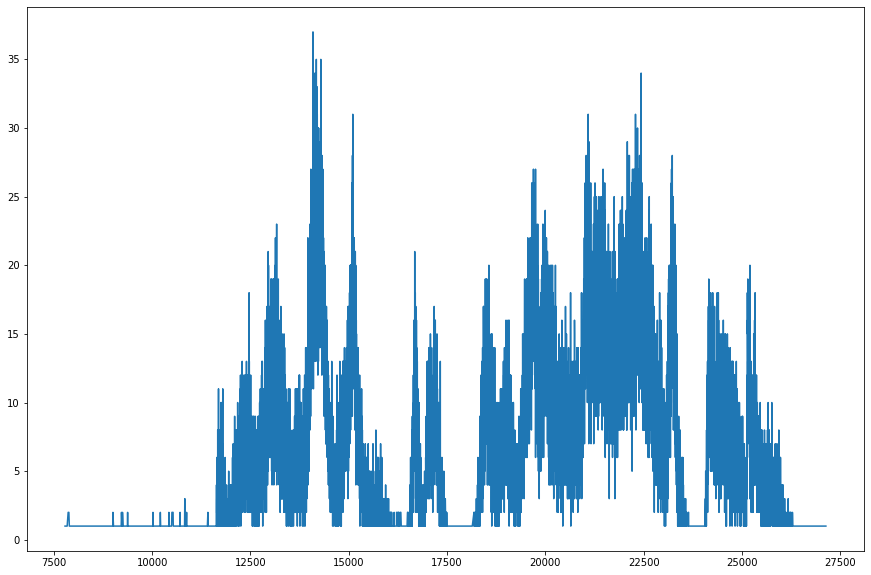

In [ ]:
plt.figure(figsize=(15,10))
data['Cost_of_the_solution'].value_counts().sort_index().plot.line()


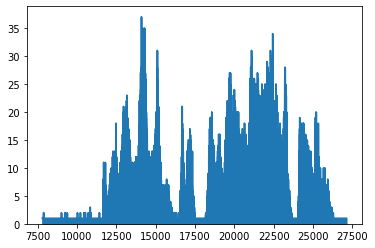

In [ ]:
data['Cost_of_the_solution'].value_counts().sort_index().plot.area()


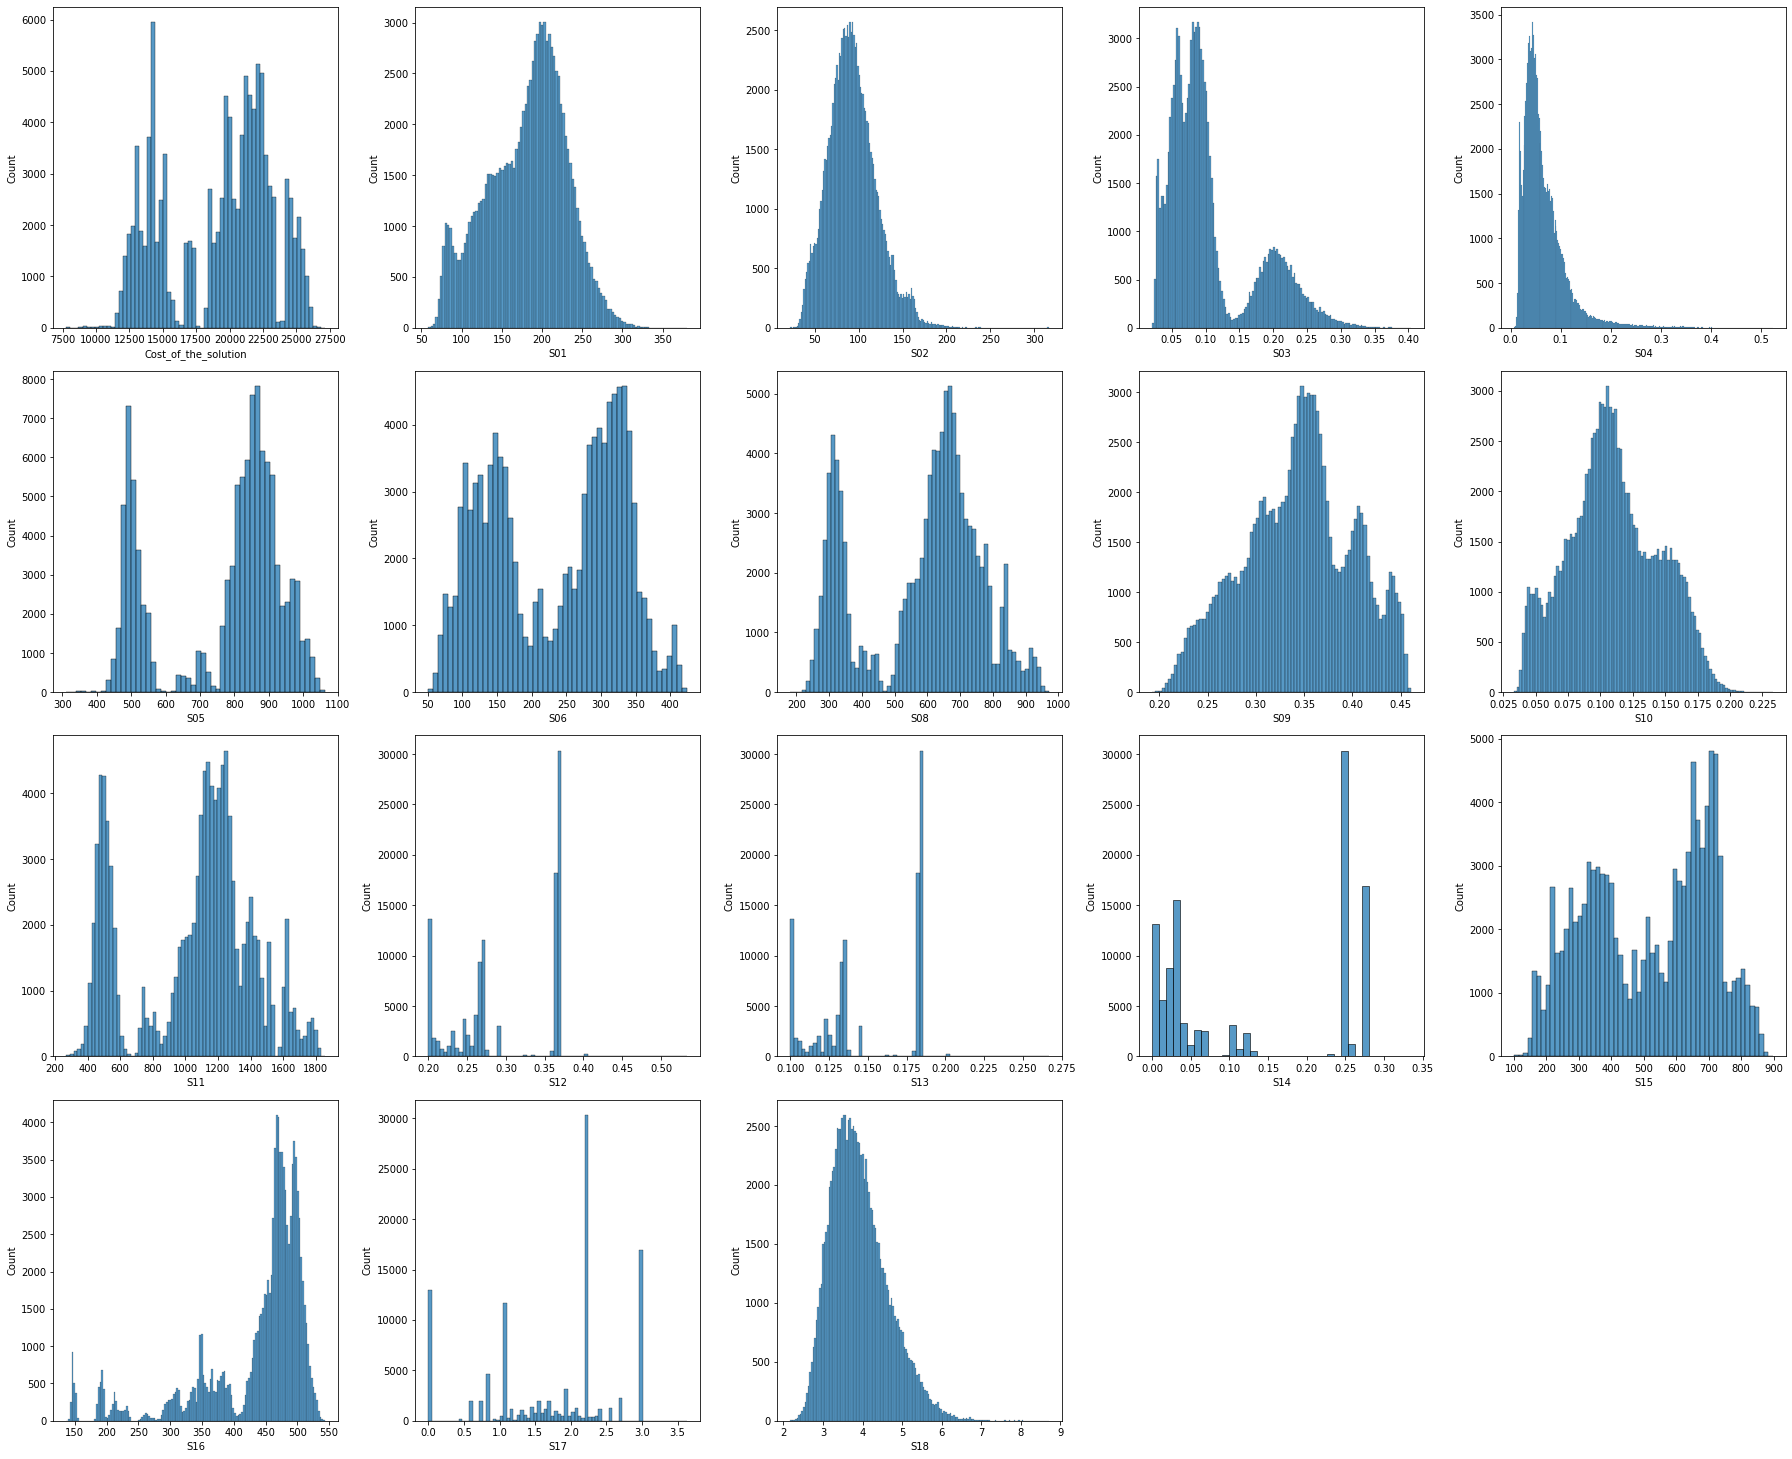

In [ ]:
cols = 5
rows = 5
num_cols = data.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = data[col], ax = ax)
fig.tight_layout()  
plt.show()

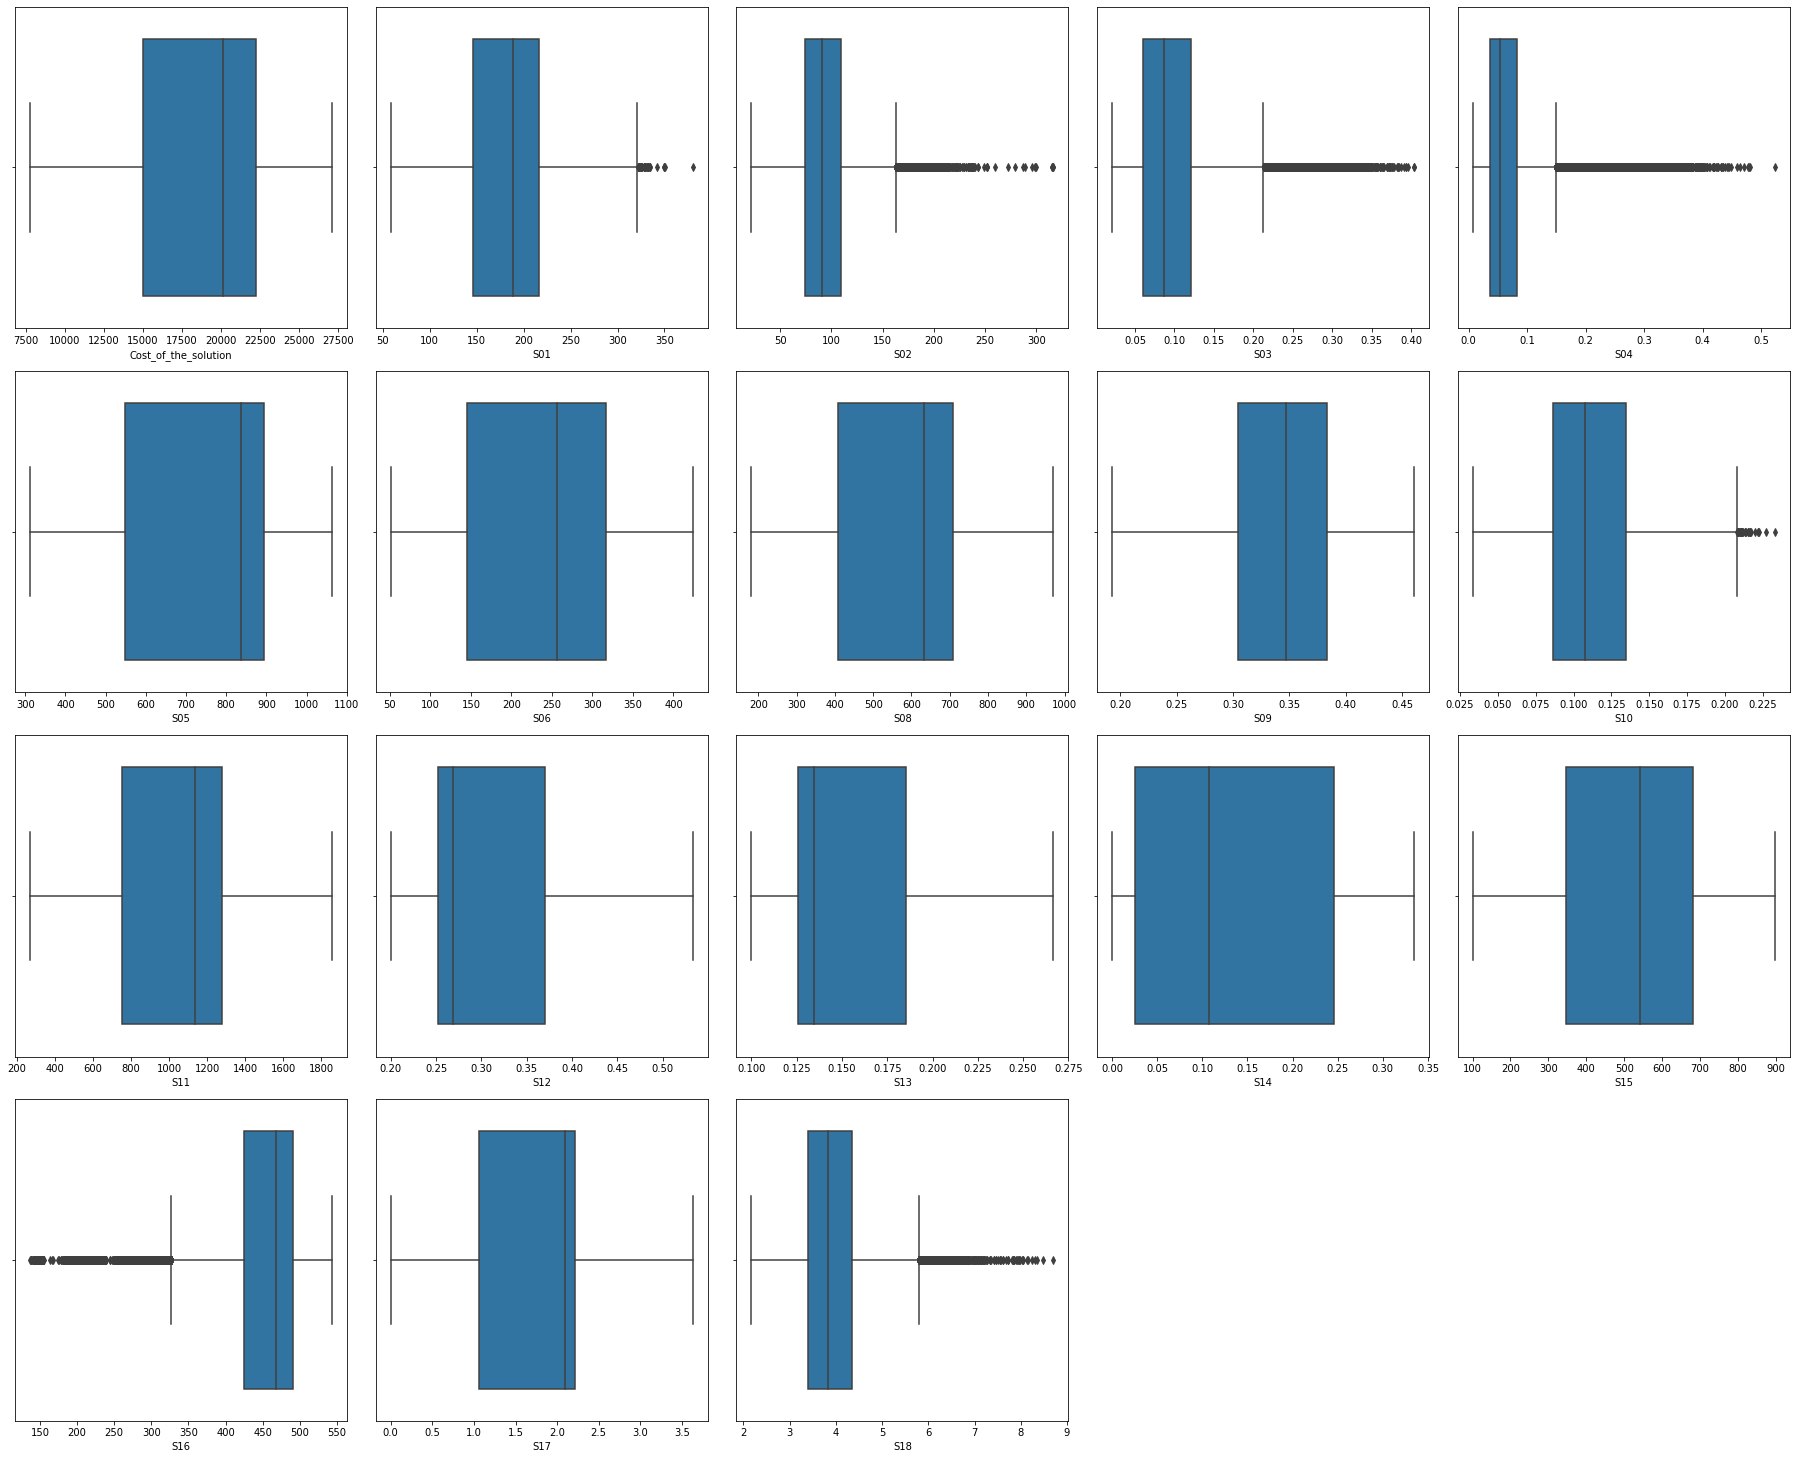

In [ ]:
cols = 5
rows = 5
num_cols = data.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.boxplot(x = data[col], ax = ax)
fig.tight_layout()  
plt.show()

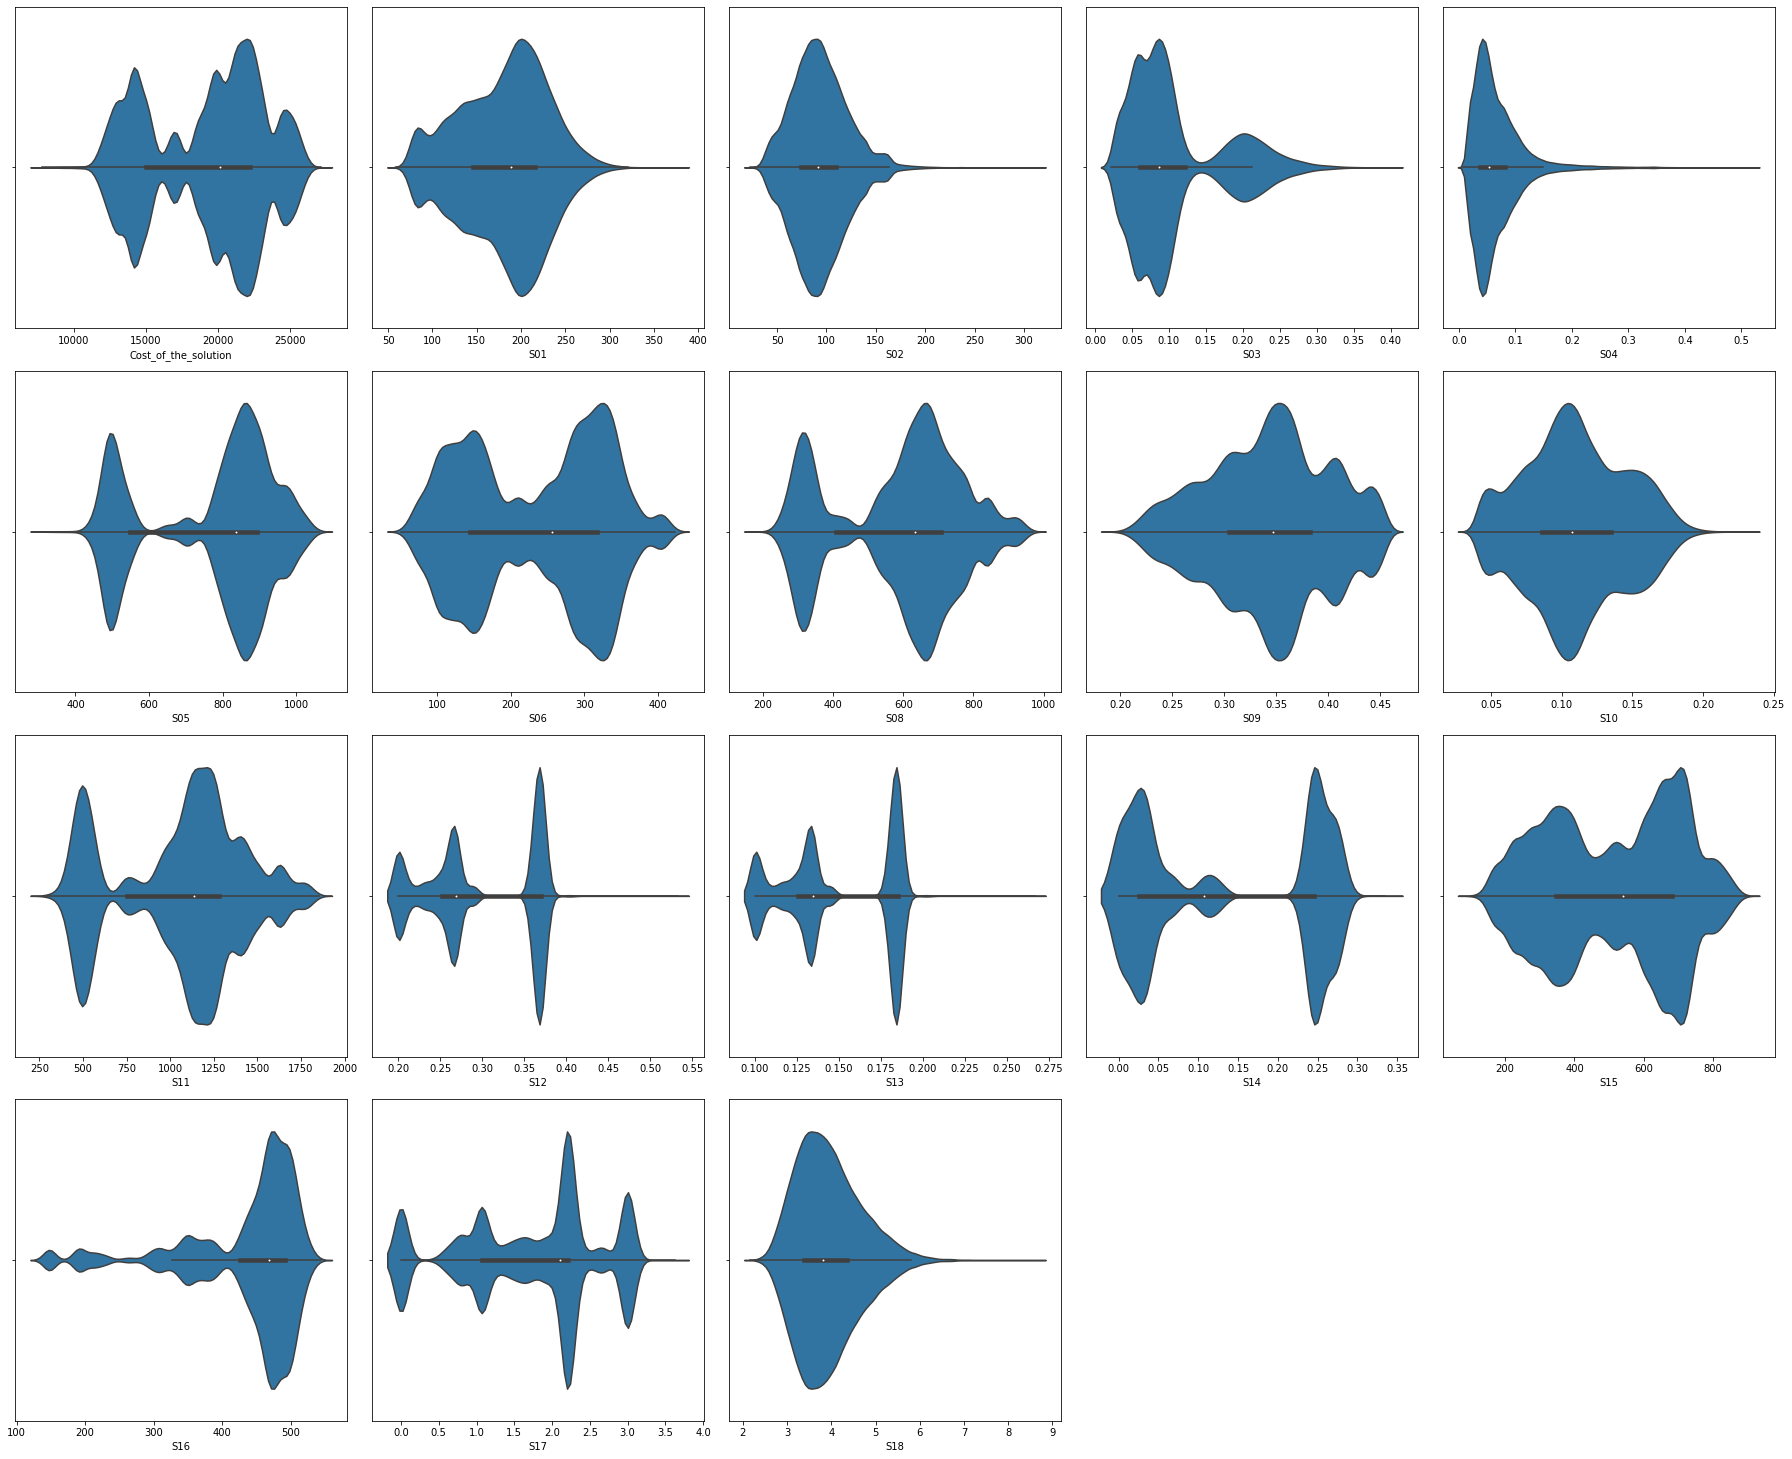

In [ ]:
cols = 5
rows = 5
num_cols = data.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.violinplot(x = data[col], ax = ax)
fig.tight_layout()  
plt.show()

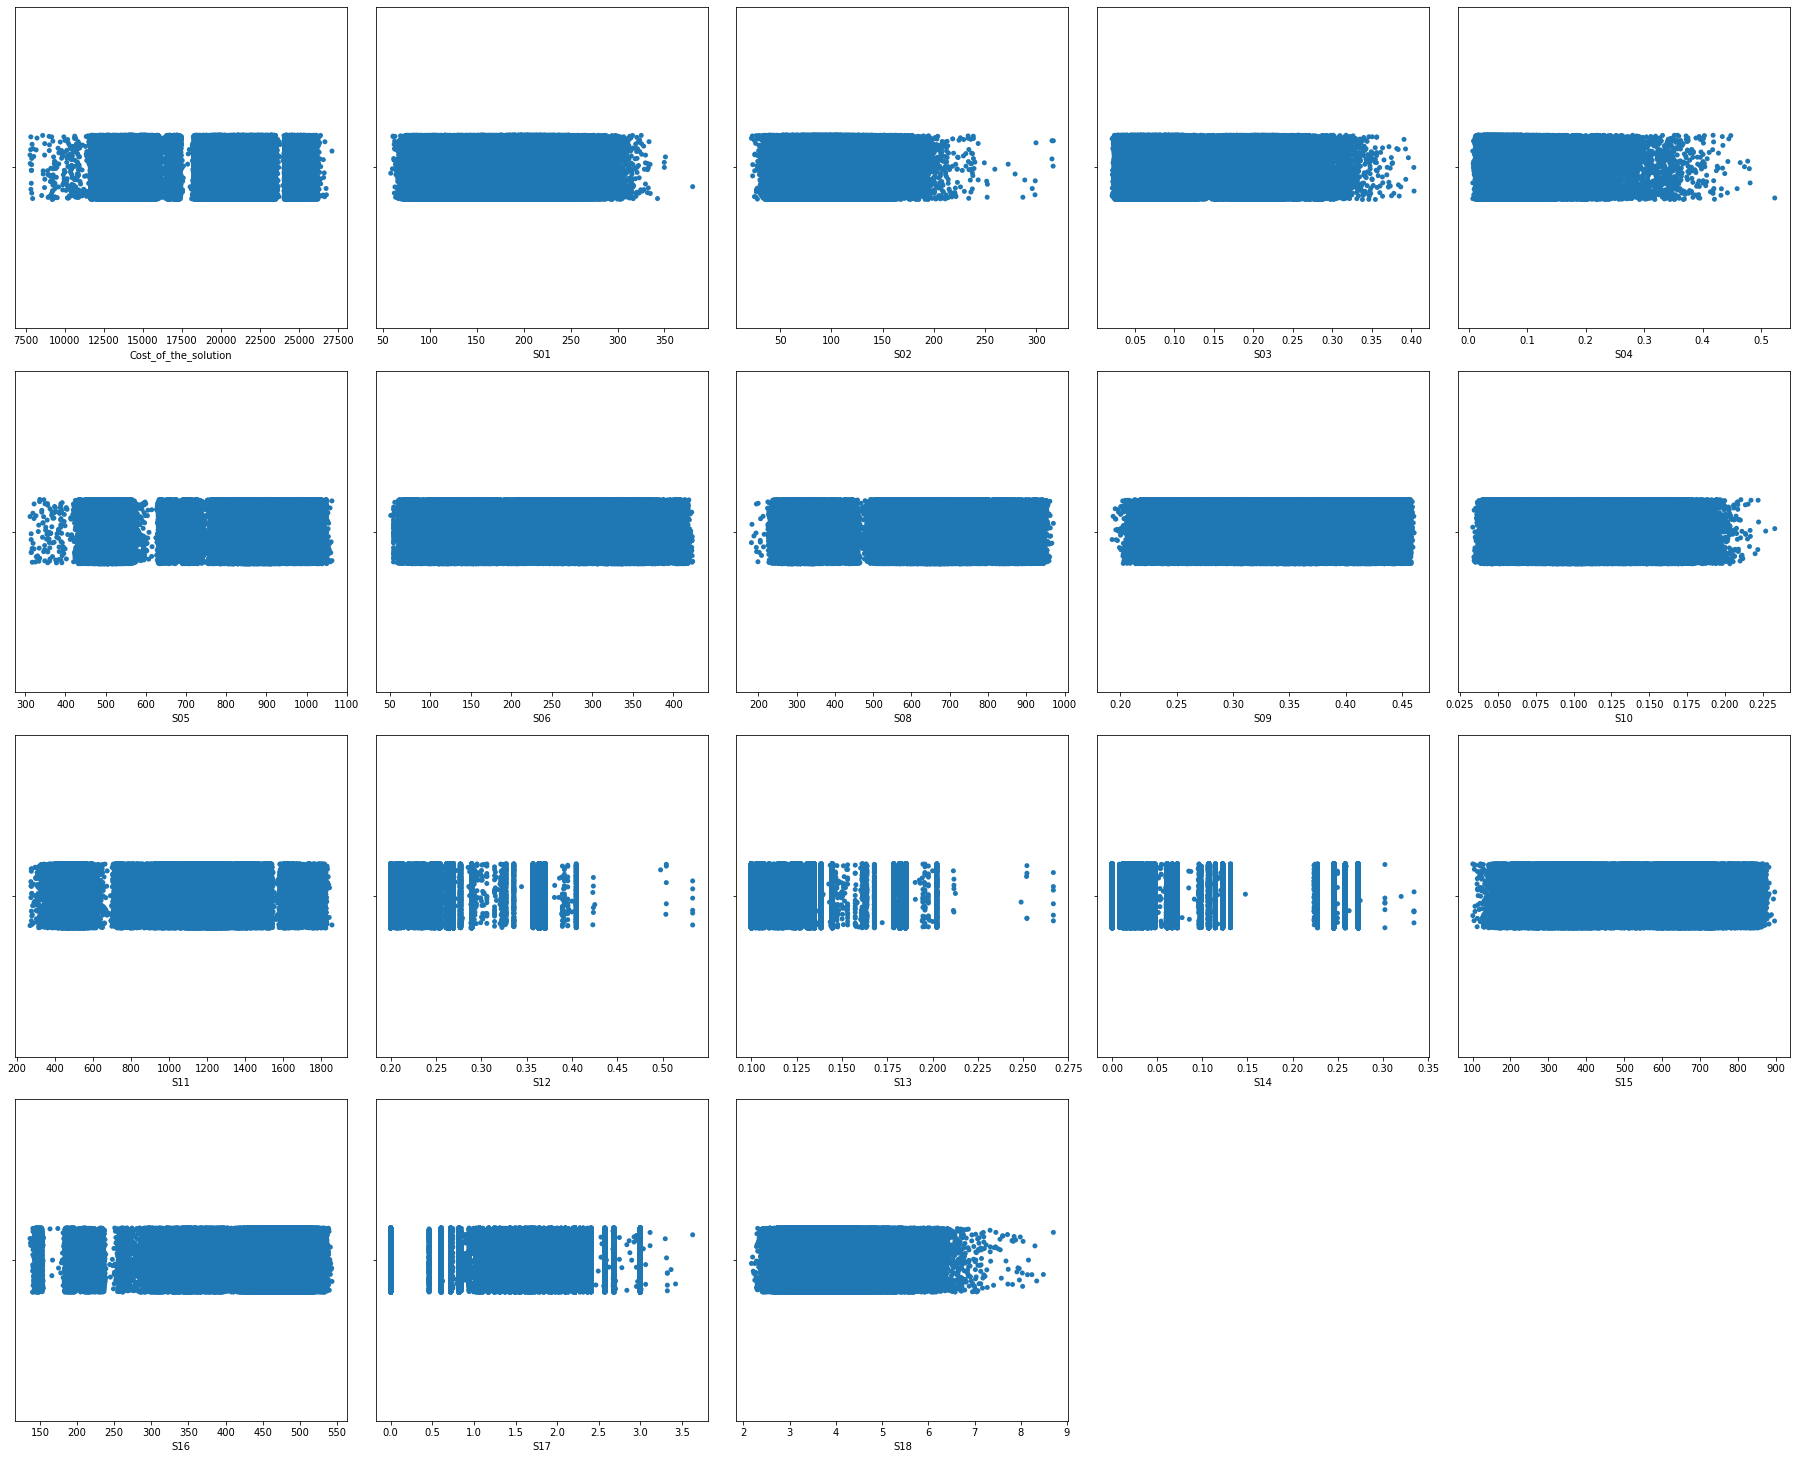

In [ ]:
cols = 5
rows = 5
num_cols = data.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.stripplot(x = data[col], ax = ax)
fig.tight_layout()  
plt.show()


## Multi-Dimension Visualization 

Before proceeding with the data cleaning, it is useful to establish a correlation between the response variable (in our case the cost of the solution) and other predictor variables, as some of them might not have any major impact in determining the price of the house and will not be used in the analysis.  There are many ways to discover correlation between the target variable and the rest of the features. Building pair plots, scatter plots, heat maps, and a correlation matrixes are the most common ones. Below, we will use the `corr()` function to list the top features based on the [pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) (measures how closely two sequences of numbers are correlated), heat map and other ways for feature selection. Correlation coefficient can only be calculated on the numerical attributes (floats and integers), therefore, only the numeric attributes will be selected.

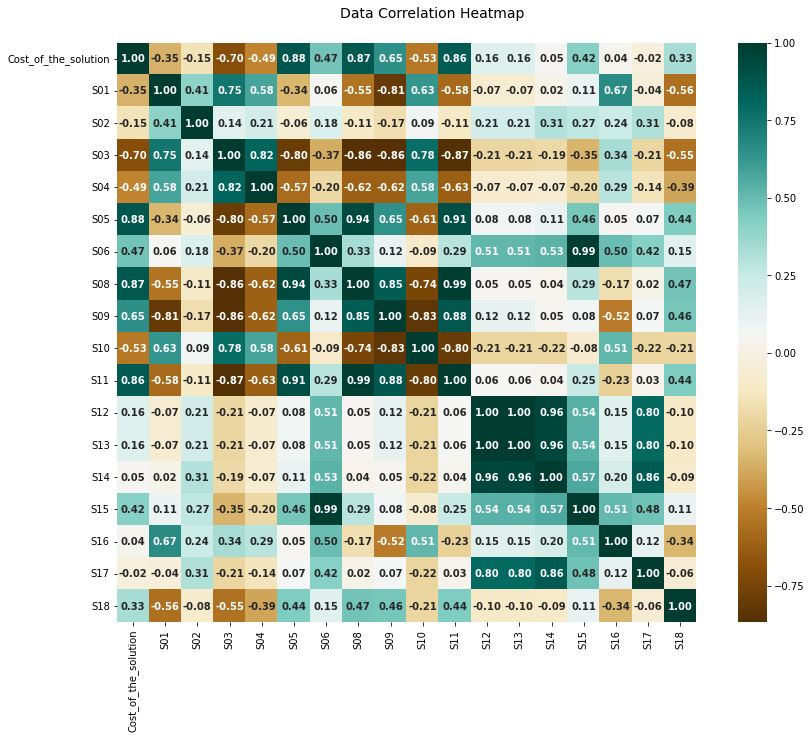

In [ ]:
plt.figure(figsize=(15,10))
data_correlation = data.corr()
sns.heatmap(data_correlation,cmap="BrBG",annot=True,fmt='.2f', square=True, annot_kws={'fontsize':10, 'fontweight':'bold'})
plt.subplots_adjust(top=0.93)
t= plt.suptitle('Data Correlation Heatmap', fontsize=14)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

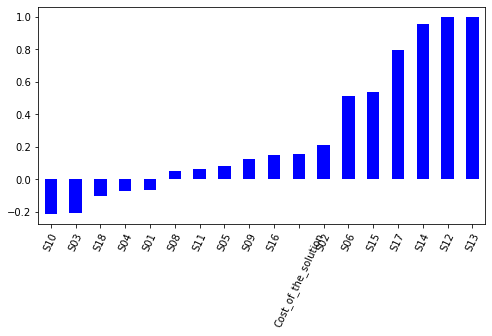

In [ ]:
data.corrwith(data['S13']).sort_values().plot(kind='bar', color='blue', figsize=(8,4))
plt.xticks(rotation=65)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

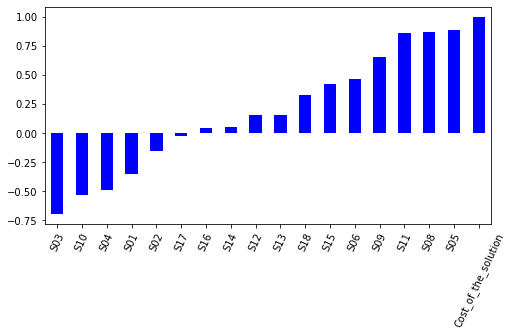

In [ ]:
data.corrwith(data['Cost_of_the_solution']).sort_values().plot(kind='bar', color='blue', figsize=(8,4))
plt.xticks(rotation=65)

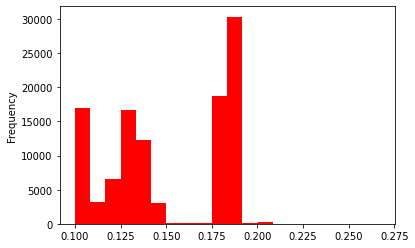

In [ ]:
# ploting to see the correlated colums 13 with other. 
data['S13'].plot(kind='hist', color='red', bins=20)


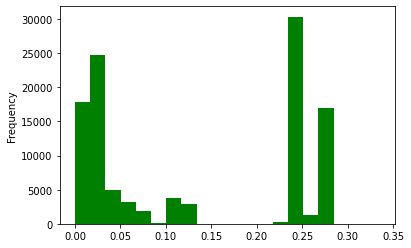

In [ ]:
data['S14'].plot(kind='hist', color='green', bins=20)

## Feature Engineering 

In [ ]:
from sklearn.preprocessing  import StandardScaler
from sklearn.decomposition  import PCA
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ARDRegression, PassiveAggressiveRegressor

In [ ]:
data

,Instance_name,Cost_of_the_solution,S01,S02,S03,S04,S05,S06,S08,S09,S10,S11,S12,S13,S14,S15,S16,S17,S18
0,XML100_2113_23,13172,269.160,85.5901,0.2460,0.1315,527.800,102.996,310.400,0.2339,0.1440,505.500,0.2000,0.1000,0.0000,252.819,491.611,0.0000,3.3833
1,XML100_2113_08,13180,199.701,122.3740,0.1750,0.0965,461.667,143.567,281.333,0.2685,0.1462,448.333,0.2639,0.1319,0.0609,353.895,424.426,1.6499,3.3899
2,XML100_2113_17,13924,223.212,107.1280,0.1883,0.1050,471.083,140.229,309.917,0.2820,0.1456,461.333,0.3704,0.1852,0.2457,377.737,443.856,2.2111,3.2552
3,XML100_2113_02,13949,239.596,107.3020,0.2279,0.1123,483.333,152.528,342.167,0.3076,0.1453,533.667,0.3704,0.1852,0.2457,361.082,471.406,2.2111,3.2292
4,XML100_2113_10,12941,245.589,146.5840,0.1984,0.1021,467.909,135.374,269.091,0.2538,0.1450,461.091,0.3657,0.1828,0.2584,403.621,431.758,2.5745,3.2109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108393,XML100_3213_07,25238,106.865,68.6338,0.0281,0.0182,1012.000,122.376,925.333,0.4419,0.0445,1787.500,0.3704,0.1852,0.2457,269.177,387.527,2.2111,4.0313
108394,XML100_3213_26,20829,138.881,114.4620,0.0360,0.0211,978.900,115.224,862.000,0.4151,0.0515,1655.500,0.3636,0.1818,0.2727,295.751,396.998,3.0000,3.7500
108395,XML100_3213_19,19947,136.513,67.1878,0.0578,0.0287,783.167,309.570,678.750,0.4068,0.0671,1256.250,0.3704,0.1852,0.2457,652.307,394.737,2.2111,3.4427
108396,XML100_3213_13,21045,161.546,112.7540,0.0546,0.0368,983.900,180.039,882.800,0.4202,0.0625,1660.000,0.2000,0.1000,0.0000,426.700,437.893,0.0000,4.0889


In [ ]:
#Selecting highly correlated features with target variable
cor_target = abs(data_correlation["Cost_of_the_solution"])
relevant_features = cor_target[cor_target>0.2]
relevant_features

Cost_of_the_solution    1.000000
S01                     0.351726
S03                     0.697300
S04                     0.485813
S05                     0.881955
S06                     0.467681
S08                     0.871777
S09                     0.653285
S10                     0.529571
S11                     0.856805
S15                     0.420213
S18                     0.330615
Name: Cost_of_the_solution, dtype: float64

In [ ]:
# Adding Instance Name to column names
rel_features = relevant_features.index.tolist()
rel_features.insert(0, 'Instance_name')

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
correlated = correlation(data, 0.85)
correlated

{'S05', 'S08', 'S09', 'S11', 'S13', 'S14', 'S15', 'S17'}

In [ ]:
# Removing just one highly inter-correlated feature
# Dropping S17 only works in subset 3113
# df.drop('S17', axis=1, inplace=True)

In [ ]:
data.columns

Index(['Instance_name', 'Cost_of_the_solution', 'S01', 'S02', 'S03', 'S04',
       'S05', 'S06', 'S08', 'S09', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15',
       'S16', 'S17', 'S18'],
      dtype='object')

In [ ]:
features = ['S01', 'S02', 'S03', 'S04',
       'S05', 'S06', 'S08', 'S09', 'S10', 'S11', 'S12', 'S13',
       'S16', 'S17', 'S18']

target = ['Cost_of_the_solution']
X = data[features]
Y = data[target]

In [ ]:
X = data[features]
Y = data[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3)


In [ ]:
X_train.shape


(75878, 15)

## Regression Models

* Linear Regression
* Ridge Regression
* Lasso Regression
* ARD Regression
* Passive Aggressive Regressor

In [ ]:
def model_maker(model=LinearRegression()):
  model.fit(X_train, y_train)
  score_train = model.score(X_train, y_train)
  score_test = model.score(X_test, y_test)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  sns.barplot(data=pd.DataFrame(model.coef_.reshape(1,15), columns=X_train.columns))
  plt.xticks(rotation=60)
  plt.show()
  return model, score_train, score_test, y_pred_train, y_pred_test

Linear regression model has been used to check how well the data is going to fit the model. 

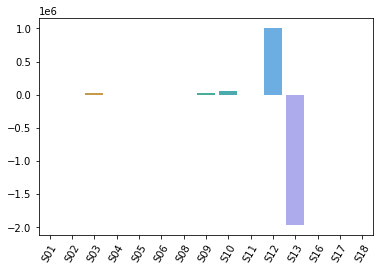

In [ ]:
reg = LinearRegression(fit_intercept=True)

reg, score_train_reg, score_test_reg, y_pred_train_reg, y_pred_test_reg = model_maker(model=reg)

Ridge regression model has been to tune the data and to analyse the data and seee if the data suffers from multicollinearity.

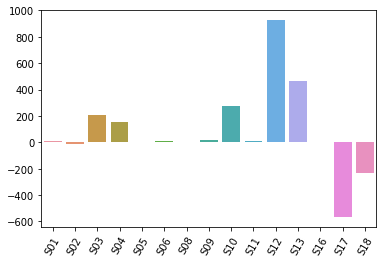

In [ ]:
rng = Ridge(solver ='saga')

rng, score_train_rng, score_test_rng, y_pred_train_rng, y_pred_test_rng = model_maker(model=rng)

Lasso regression model is used to regularize technique the data.

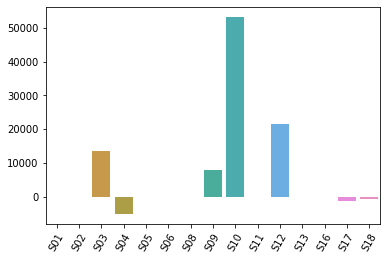

In [ ]:
lasso = Lasso(alpha = .8)
lasso, score_train_lasso, score_test_lasso, y_pred_train_lasso, y_pred_test_lasso = model_maker(model=lasso)

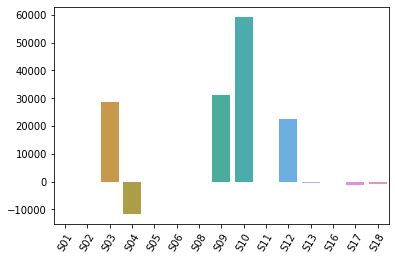

In [ ]:
ard = ARDRegression(alpha_1=.9, alpha_2=.9, lambda_1=1e-7, lambda_2=1e-7)

ard, score_train_ard, score_test_ard, y_pred_train_ard, y_pred_test_ard = model_maker(model=ard)

Passive Aggressive Regression is a regression algorithm that falls under the category of online learning in machine learning.

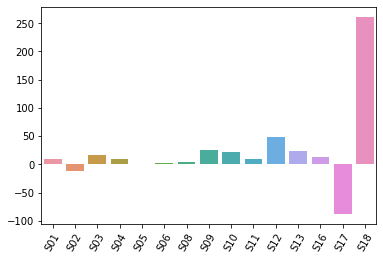

In [ ]:
par = PassiveAggressiveRegressor(C=.6, loss='epsilon_insensitive', epsilon=1e-6, random_state=3)

par, score_train_par, score_test_par, y_pred_train_par, y_pred_test_par = model_maker(model=par)

In [ ]:
train_scores = [score_train_reg, score_train_rng,  score_train_lasso,  score_train_ard,  score_train_par]  
test_scores = [score_test_reg, score_test_rng,  score_test_lasso,  score_test_ard,  score_test_par]
models =['reg','rng','lasso','ard','par']
dict_scores = {
'Train score':train_scores,'Test score':test_scores}
df_score = pd.DataFrame(dict_scores, index=models)

Comparing all the results to see the train score, and test score 

In [ ]:
df_score

,Train score,Test score
reg,0.912517,0.912467
rng,0.845364,0.846269
lasso,0.909736,0.909788
ard,0.912409,0.912351
par,0.406697,0.403286


* Random Forest Regressor
* Decision Tree Regressor
* Support Vector Regressor

### Splitting data into train and test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score 
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

In [ ]:
# Training the model
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
# Making predictions using test data
y_pred = regressor.predict(X_test)

In [ ]:
random_forest_r2 = r2_score(y_test, y_pred)

In [ ]:
random_forest_r2

0.9992804677408786

add here 

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
decision_tree_r2 = r2_score(y_test, y_pred)

In [ ]:
decision_tree_r2

0.9992804677408786

In [ ]:
print(X_train)

             S01       S02     S03     S04      S05      S06      S08     S09  \
16166   230.9680  143.5220  0.1918  0.0934  479.182  110.465  287.454  0.2465   
59343   244.3600  110.9900  0.1254  0.1024  811.800  377.183  550.800  0.3141   
97306   118.5710   64.6138  0.0667  0.0483  671.083  189.077  535.667  0.3657   
88195   111.6830   63.7688  0.0497  0.0374  882.500  314.952  756.750  0.4157   
69481   135.9730  113.5730  0.0693  0.0706  867.333  317.880  743.167  0.4066   
...          ...       ...     ...     ...      ...      ...      ...     ...   
65833   197.8510   99.4953  0.0924  0.0627  836.917  295.729  627.417  0.3490   
50437   228.1810  125.0800  0.1127  0.0741  830.400  368.640  531.700  0.2963   
746     230.9640   90.8447  0.2018  0.0863  480.000  168.746  350.667  0.3190   
102711   83.3805   47.5823  0.0378  0.0248  804.643  255.056  721.429  0.4338   
81880   124.8330   96.9412  0.0689  0.0752  664.167  217.056  517.417  0.3727   

           S10       S11   

### SVR

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [ ]:
# Normalizing data for a better processing
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

In [ ]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [ ]:
svr_r2 = r2_score(y_test, y_pred)

### R2 Results

In [ ]:
# a function to use for adjusted R^2
rows, feature_count = X.shape

def adj_r2(r2, p_feature_count, n_rows):
    '''Get the adjusted R^2 value.

    Args:
        p_feature_count (int): the number of independent variables.
        n_rows (int): the number of observations.

    '''
    return 1-(1-r2)*(n_rows-1)/(n_rows-p_feature_count-1)

In [ ]:
# Dictionary of regressions and their R^2 values
r2_dict = {
    'Random Forest Regression': random_forest_r2,
    'Decision Tree Regression': decision_tree_r2,
    'Support Vector Regression (SVR)': svr_r2
}

# default values
best = 0.0
best_name = ''

# print out a table of results
print("{: <40} {: <20} {: <20}".format('Regression', 'R^2', 'Adjusted R^2'))
print('-'*80)
for key, val in r2_dict.items():
    if val > best:
        best = val
        best_name = key
    print("{: <40} {: <20} {: <20}".format(key, val, adj_r2(val, feature_count, rows)))

# print the best result
print('-'*80)
print(best_name, 'gave the best result, R^2:', best)

Regression                               R^2                  Adjusted R^2        
--------------------------------------------------------------------------------
Random Forest Regression                 0.9992804677408786   0.9992803681580708  
Decision Tree Regression                 0.9992804677408786   0.9992803681580708  
Support Vector Regression (SVR)          0.9992804677408786   0.9992803681580708  
--------------------------------------------------------------------------------
Random Forest Regression gave the best result, R^2: 0.9992804677408786


## Classification Modeling

1. Logistic Regression
2. Decision Trees
3. k-Nearest Neighbours
4. Support Vector Machines
5. Random Forest ensemble
6. Voting Classifiers

Transformation into a classification problem: we want to create new column that includes categorical variables according to values in the cost of the solution feature.

In [ ]:
data['bins'] = pd.qcut(data['Cost_of_the_solution'],
                           q=[0, .25, .5, .75, 1],
                           labels=['bad', 'average', 'good', 'excellent'])
data.head(10)

,Instance_name,Cost_of_the_solution,S01,S02,S03,S04,S05,S06,S08,S09,S10,S11,S12,S13,S14,S15,S16,S17,S18,bins
0,XML100_2113_23,13172,269.160,85.5901,0.2460,0.1315,527.800,102.996,310.400,0.2339,0.1440,505.500,0.2000,0.1000,0.0000,252.819,491.611,0.0000,3.3833,bad
1,XML100_2113_08,13180,199.701,122.3740,0.1750,0.0965,461.667,143.567,281.333,0.2685,0.1462,448.333,0.2639,0.1319,0.0609,353.895,424.426,1.6499,3.3899,bad
2,XML100_2113_17,13924,223.212,107.1280,0.1883,0.1050,471.083,140.229,309.917,0.2820,0.1456,461.333,0.3704,0.1852,0.2457,377.737,443.856,2.2111,3.2552,bad
3,XML100_2113_02,13949,239.596,107.3020,0.2279,0.1123,483.333,152.528,342.167,0.3076,0.1453,533.667,0.3704,0.1852,0.2457,361.082,471.406,2.2111,3.2292,bad
4,XML100_2113_10,12941,245.589,146.5840,0.1984,0.1021,467.909,135.374,269.091,0.2538,0.1450,461.091,0.3657,0.1828,0.2584,403.621,431.758,2.5745,3.2109,bad
5,XML100_2113_10,13249,266.668,154.0720,0.2416,0.1821,464.000,128.897,315.818,0.2683,0.1470,520.455,0.2371,0.1185,0.0434,360.103,434.866,1.8318,3.0568,bad
6,XML100_2113_27,14101,243.157,138.2850,0.2263,0.1394,482.583,153.282,313.167,0.2776,0.1242,512.333,0.3704,0.1852,0.2457,395.881,458.521,2.2111,2.7708,bad
7,XML100_2113_23,13767,252.201,106.1830,0.2133,0.0786,511.727,120.888,329.818,0.2718,0.1502,489.091,0.2502,0.1251,0.0670,325.615,467.138,2.1086,3.3586,bad
8,XML100_2113_06,14203,221.003,115.2640,0.1934,0.1378,494.833,161.426,334.333,0.2965,0.1340,511.167,0.3704,0.1852,0.2457,394.733,465.452,2.2111,3.1563,bad
9,XML100_2113_02,13919,231.106,84.2847,0.2321,0.0725,486.083,164.944,346.750,0.3147,0.1729,539.750,0.2894,0.1447,0.1072,380.018,474.561,1.9293,3.2619,bad


In [ ]:
X = data.drop(['Instance_name', 'Cost_of_the_solution'], axis=1)
y = data['bins']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


### Label Encoding the newly created variables 

In [ ]:
# Assigning numerical values and storing in another column
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [ ]:
# Creating bins based on quartiles to make a binary target variable
data['bins'] = pd.qcut(data['Cost_of_the_solution'],
                           q=[0, .5, 1],
                           labels=['bad', 'good'])


In [ ]:
# Label encoding the bins feature to 0 and 1 for a better processing
data['bins'] = labelencoder.fit_transform(data['bins'])

In [ ]:
data.head()

,Instance_name,Cost_of_the_solution,S01,S02,S03,S04,S05,S06,S08,S09,S10,S11,S12,S13,S14,S15,S16,S17,S18,bins
0,XML100_2113_23,13172,269.160,85.5901,0.2460,0.1315,527.800,102.996,310.400,0.2339,0.1440,505.500,0.2000,0.1000,0.0000,252.819,491.611,0.0000,3.3833,0
1,XML100_2113_08,13180,199.701,122.3740,0.1750,0.0965,461.667,143.567,281.333,0.2685,0.1462,448.333,0.2639,0.1319,0.0609,353.895,424.426,1.6499,3.3899,0
2,XML100_2113_17,13924,223.212,107.1280,0.1883,0.1050,471.083,140.229,309.917,0.2820,0.1456,461.333,0.3704,0.1852,0.2457,377.737,443.856,2.2111,3.2552,0
3,XML100_2113_02,13949,239.596,107.3020,0.2279,0.1123,483.333,152.528,342.167,0.3076,0.1453,533.667,0.3704,0.1852,0.2457,361.082,471.406,2.2111,3.2292,0
4,XML100_2113_10,12941,245.589,146.5840,0.1984,0.1021,467.909,135.374,269.091,0.2538,0.1450,461.091,0.3657,0.1828,0.2584,403.621,431.758,2.5745,3.2109,0


### Logistic Regression

In [ ]:
data.columns

Index(['Instance_name', 'Cost_of_the_solution', 'S01', 'S02', 'S03', 'S04',
       'S05', 'S06', 'S08', 'S09', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15',
       'S16', 'S17', 'S18', 'bins'],
      dtype='object')

In [ ]:
features = ['S01', 'S02', 'S03', 'S04',
       'S05', 'S06', 'S08', 'S09', 'S10', 'S11', 'S12', 'S13',
       'S16', 'S17', 'S18']

target = ['bins']

In [ ]:
X = data[features]
Y = data[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
clf_names = []
clf_scores = []

In [ ]:
# Normalizing data to continue with the training
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [ ]:
logistic = LogisticRegression(random_state=0)

In [ ]:
# Training the model
logistic.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
print("Logistic Regression Test Accuracy {}".format(logistic.score(X_test,y_test)))
clf_names.append("Logistic Reg.")
clf_scores.append(logistic.score(X_test,y_test))

Logistic Regression Test Accuracy 0.8264575645756458


In [ ]:
# Making predictions using the test data
y_pred = logistic.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[5543  364  104  688]
 [ 107 6624    6    0]
 [  13    0 5162 1650]
 [ 586    0 1185 5068]]


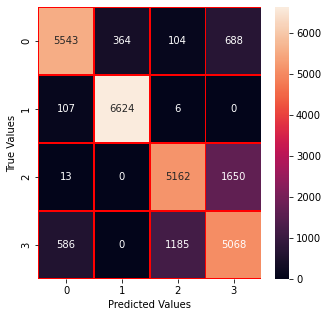

In [ ]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

As seen in the confusion matrix, the model predicts correctly the great majority of the instances.

### XGBoost Classifier 

In [ ]:
from xgboost import XGBClassifier

In [ ]:
bst = XGBClassifier()

In [ ]:
# fit model
bst.fit(X_train, y_train)
# make predictions
y_pred = bst.predict(X_test)

In [ ]:
print("XGB BOOST  Test Accuracy {}".format(bst.score(X_test,y_test)))
clf_names.append("XGboost.")
clf_scores.append(bst.score(X_test,y_test))

XGB BOOST  Test Accuracy 0.960959409594096


In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[6415  206    0   78]
 [ 105 6632    0    0]
 [   5    0 6537  283]
 [ 157    0  224 6458]]


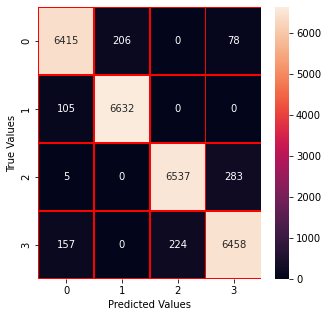

In [ ]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

XGBoost classifier performs very well, given most of the predictions were accurate.

### k-Nearest Neighbours

For K-nearest neighbors, we train the model using from 1 to 50 neighbors, in order to see the amount of neighbors that wllos a model with the highest accuracy.

In [ ]:
# Try K from 1 to 50
max_k = 50
# Create an empty list to store f1score for each k
f1_scores = []

In [ ]:
for k in range(1, max_k + 1):
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the classifier
    knn = knn.fit(X_train, y_train.values.ravel())
    preds = knn.predict(X_test)
    # Evaluate the classifier with f1score
    f1 = f1_score(preds, y_test,average='micro')
    f1_scores.append((k, round(f1_score(y_test, preds,average='micro'), 4)))
# Convert the f1score list to a dataframe
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
f1_results.set_index('K')

,F1 Score
K,
1,0.9552
2,0.9520
3,0.9583
4,0.9568
5,0.9591
6,0.9580
7,0.9589
8,0.9583
9,0.9582


In [ ]:
f1_results.sort_values

<bound method DataFrame.sort_values of      K  F1 Score
0    1    0.9552
1    2    0.9520
2    3    0.9583
3    4    0.9568
4    5    0.9591
5    6    0.9580
6    7    0.9589
7    8    0.9583
8    9    0.9582
9   10    0.9580
10  11    0.9583
11  12    0.9582
12  13    0.9578
13  14    0.9570
14  15    0.9569
15  16    0.9569
16  17    0.9562
17  18    0.9565
18  19    0.9564
19  20    0.9560
20  21    0.9559
21  22    0.9557
22  23    0.9558
23  24    0.9557
24  25    0.9554
25  26    0.9554
26  27    0.9549
27  28    0.9551
28  29    0.9546
29  30    0.9547
30  31    0.9546
31  32    0.9549
32  33    0.9546
33  34    0.9550
34  35    0.9547
35  36    0.9547
36  37    0.9545
37  38    0.9541
38  39    0.9538
39  40    0.9538
40  41    0.9531
41  42    0.9531
42  43    0.9534
43  44    0.9531
44  45    0.9532
45  46    0.9531
46  47    0.9529
47  48    0.9524
48  49    0.9525
49  50    0.9525>

Text(0.5, 1.0, 'KNN F1 Score')

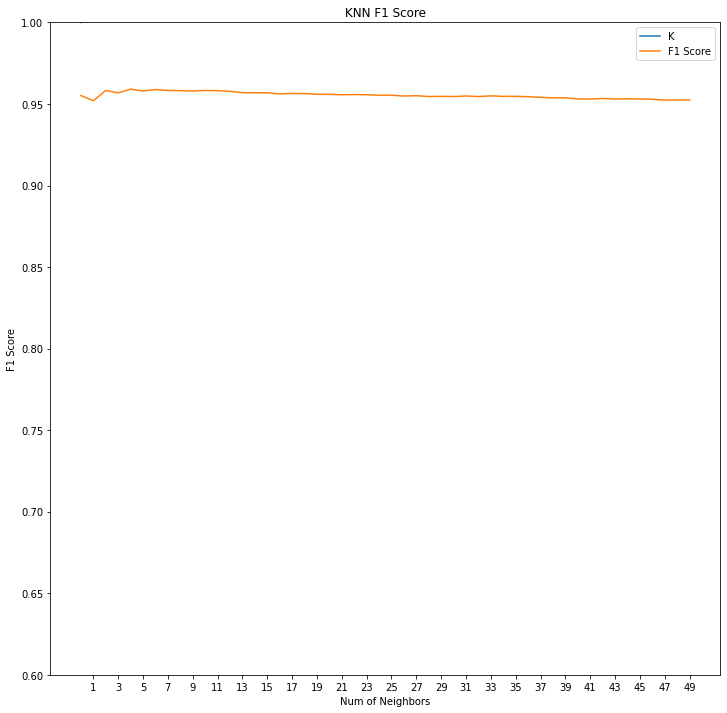

In [ ]:
# Plot F1 results
ax = f1_results.plot(figsize=(12, 12))
ax.set(xlabel='Num of Neighbors', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.ylim((0.6, 1))
plt.title('KNN F1 Score')

In [ ]:
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train,y_train)
y_pred = clf_knn.predict(X_test)

K-Nearest Neighbours Test Accuracy 0.9583025830258303
[[6422  215    0   62]
 [ 152 6585    0    0]
 [   2    0 6513  310]
 [ 153    0  236 6450]]


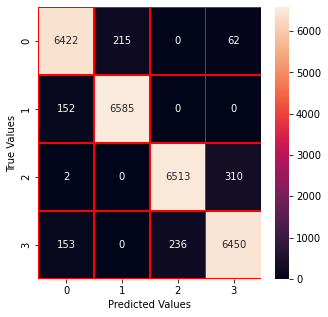

In [ ]:
print("K-Nearest Neighbours Test Accuracy {}".format(clf_knn.score(X_test,y_test)))
clf_names.append("K-NN")
clf_scores.append(clf_knn.score(X_test,y_test))
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)


[[6422  215    0   62]
 [ 152 6585    0    0]
 [   2    0 6513  310]
 [ 153    0  236 6450]]


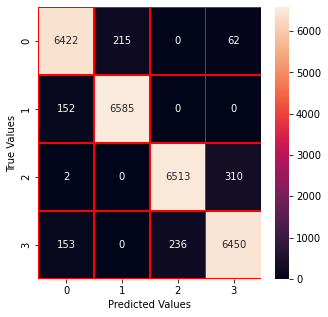

In [ ]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

### Support Vector Machines

The `SVC` model provided by sklearn has two important arguments to be tuned: regularization parameter `C` and `kernel`.
The `C` argument is a regularization parameter.

*   For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly.
*   Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.
The `kernel` argument specifies the kernel to be used for transforming features to higher-dimensional spaces, some commonly used non-linear kernels are:

*   `rbf`: Gaussian Radial Basis Function (RBF)
*   `poly`: Polynomial Kernel
*   `sigmoid`: Sigmoid Kernel


In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel='rbf', random_state=0)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [ ]:
print("SVM Test Accuracy {}".format(svm.score(X_test,y_test)))
clf_names.append("SVM")
clf_scores.append(svm.score(X_test,y_test))

SVM Test Accuracy 0.9655350553505535


In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[6484  185    0   30]
 [ 108 6629    0    0]
 [   5    0 6571  249]
 [ 175    0  182 6482]]


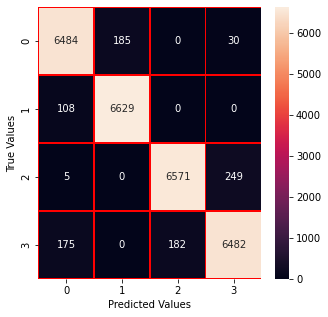

In [ ]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='micro')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    sns.barplot(data =pd.DataFrame([results_pos]))
    return results_pos

{'accuracy': 0.9655350553505535,
 'recall': 0.9655350553505535,
 'precision': 0.9655350553505535,
 'f1score': 0.9655350553505535}

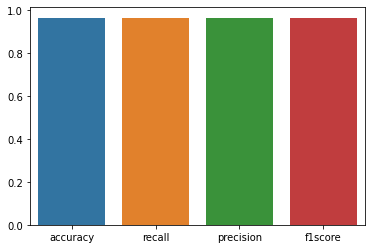

In [ ]:
evaluate_metrics(y_test, y_pred)

### Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_tree = DecisionTreeClassifier(criterion='entropy',random_state=0)
decision_tree.fit(X_train,y_train)
y_pred = decision_tree.predict(X_test)

In [ ]:
print("Descision Tree Score: ",decision_tree.score(X_test,y_test))
clf_names.append("Random Forest")
clf_scores.append(decision_tree.score(X_test,y_test))

Descision Tree Score:  0.9659778597785977


In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[6456  155    0   88]
 [ 142 6595    0    0]
 [   3    0 6586  236]
 [  80    0  218 6541]]


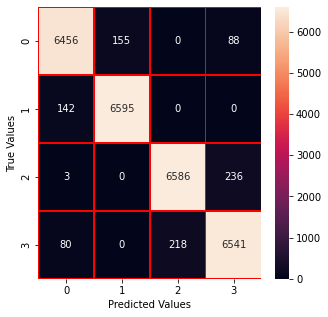

In [ ]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

As seen in the confusion matrix, most of the values were correctly predicted by the model. There are few mispredictions, making a very accurate model

### Random Forest ensemble

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rand_forest = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rand_forest.fit(X_train,y_train)
y_pred = rand_forest.predict(X_test)

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[6562  102    0   35]
 [ 109 6628    0    0]
 [   3    0 6683  139]
 [  96    0  186 6557]]


In [ ]:
print("Random Forest Score: ",rand_forest.score(X_test,y_test))
clf_names.append("Random Forest")
clf_scores.append(rand_forest.score(X_test,y_test))

Random Forest Score:  0.9752767527675277


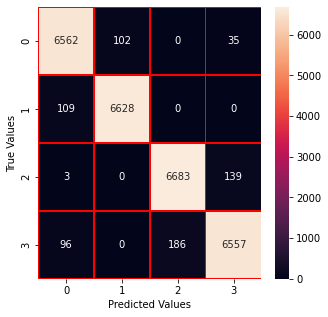

In [ ]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

As we can see in the confusion matrix, most of the instances were well predicted by the model, giving a very high accuracy in the predictions.

### Compare all of these Classification Models

Text(0, 0.5, 'Classifier Score')

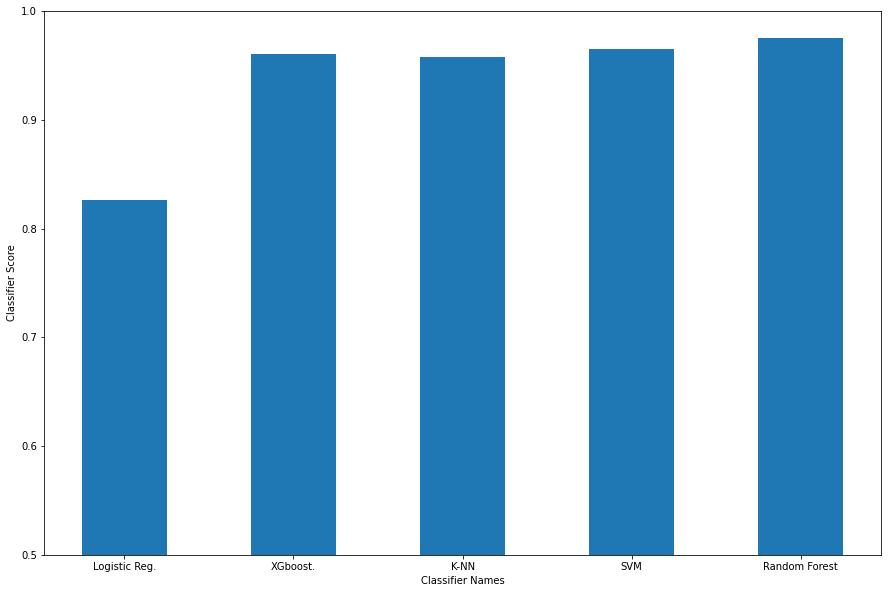

In [ ]:
plt.figure(figsize=(15,10))
plt.ylim([0.5,1])
plt.bar(clf_names,clf_scores,width=0.5)
plt.xlabel('Classifier Names')
plt.ylabel('Classifier Score')

## Conclusion

To sum up, we have trained several models from regression to classification models. Hence, we found from the classification model that Random forest and Xgboost outperform the other tree classifiers which are logistics regression, support vector machine, and knn. 